In [57]:
#import libraries
import numpy as np
import pandas as pd

dataset = pd.read_csv('../datasets/50_Startups.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , 4]. values

In [58]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[: , 3])
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

In [59]:
#avoid dummy variable trap
X = X[:, 1:]

In [60]:
#splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was f

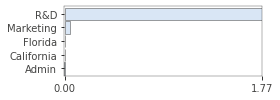

In [61]:
import rfpimp as rp

rf = rp.RandomForestRegressor(n_estimators=100)
x_train1 = pd.DataFrame(X_train)
y_train1 = pd.DataFrame(Y_train)
x_test1 = pd.DataFrame(X_test, columns=['Florida', 'California', 'R&D', 'Admin', 'Marketing'])
y_test1 = pd.DataFrame(Y_test, columns=['Profit'])
rf.fit(x_train1, Y_train)
imp = rp.importances(rf, x_test1, y_test1)
viz = rp.plot_importances(imp)
viz.view()

In [62]:
#fitting MLR to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [63]:
#predicting test results
Y_pred = regressor.predict(X_test)

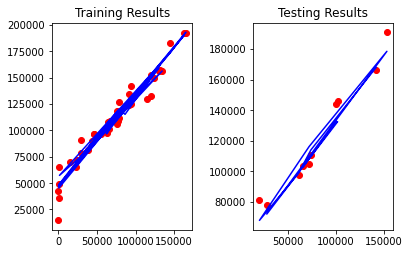

In [64]:
#Visualise
import matplotlib.pyplot as plt

#visualise results
fit, (ax1, ax2) = plt.subplots(1, 2)
fit.tight_layout(pad=3) 
#training
ax1.title.set_text('Training Results')
ax1.scatter(X_train[:, 2], Y_train, color = 'red')
ax1.plot(X_train[:, 2], regressor.predict(X_train), color = 'blue')
#testing
ax2.title.set_text('Testing Results')
ax2.scatter(X_test[:, 2], Y_test, color = 'red')
ax2.plot(X_test[:, 2], regressor.predict(X_test), color = 'blue')